   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Null Values in age: 177
Count                        714
Mean                   29.699118
Median                      28.0
Mode                      [24.0]
Minimum                     0.42
Maximum                     80

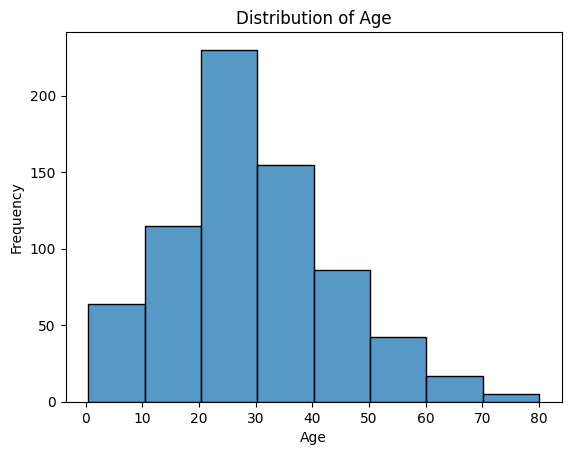

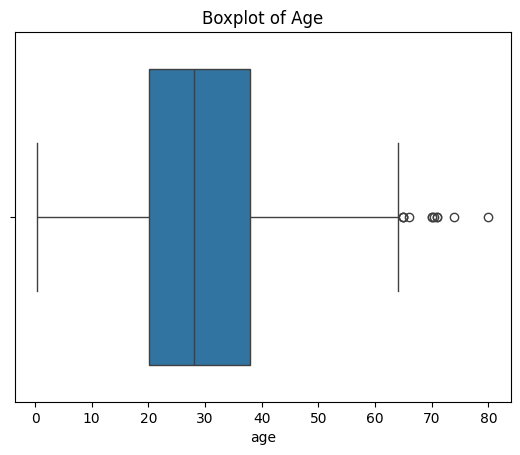

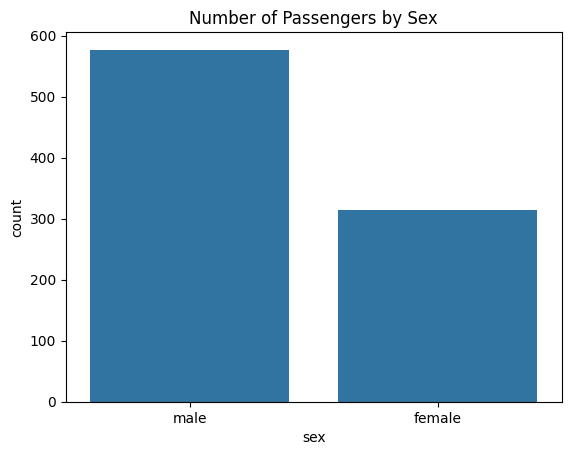

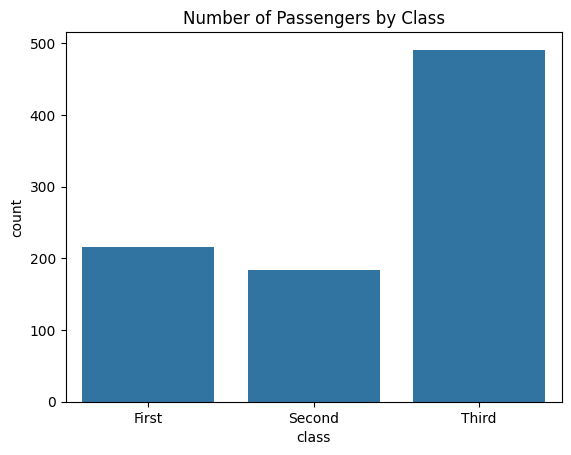

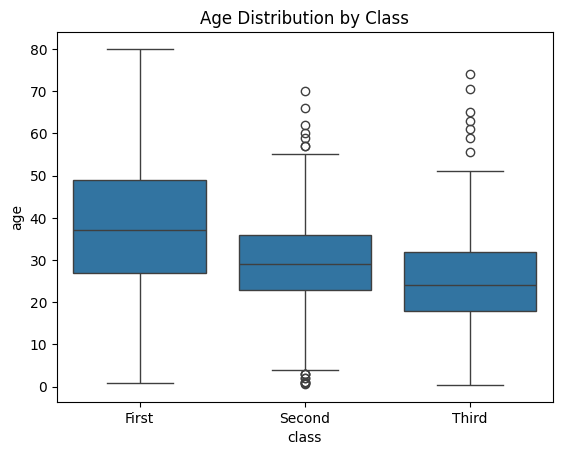

Correlation Matrix (numeric variables):
            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone        

C:\Users\XNovaQ.7\AppData\Local\Temp\ipykernel_19436\4150421527.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['class', 'sex'])[['age', 'fare']].mean())


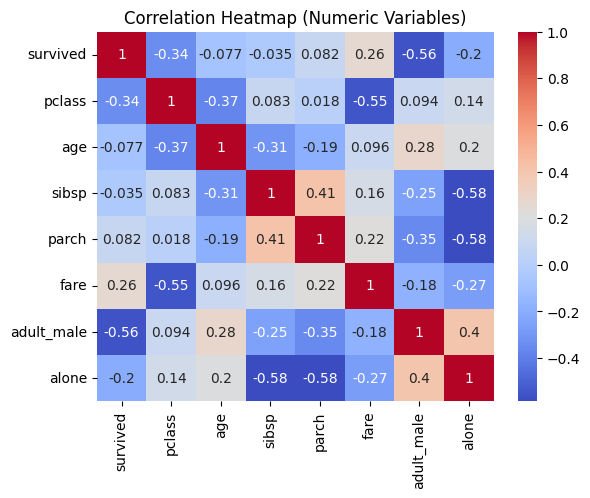

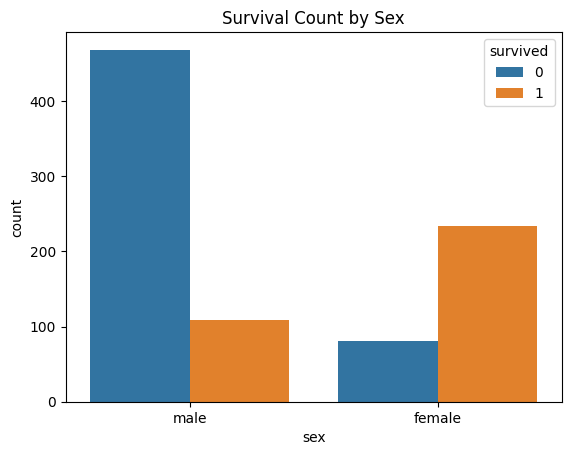

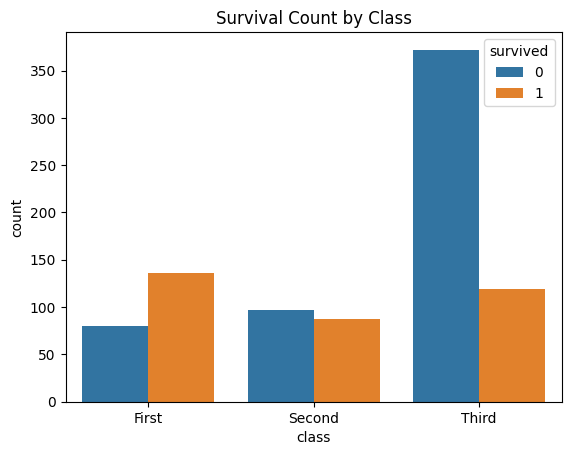

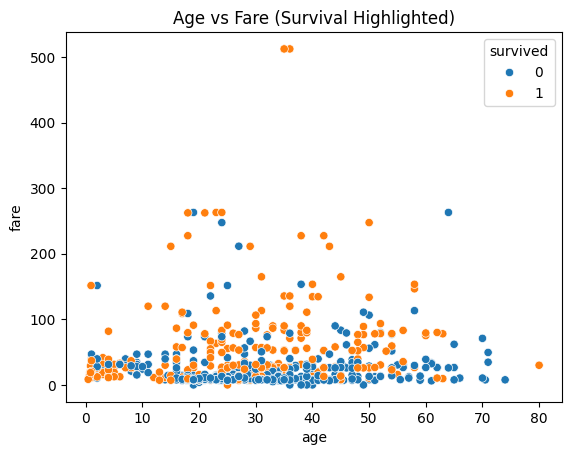

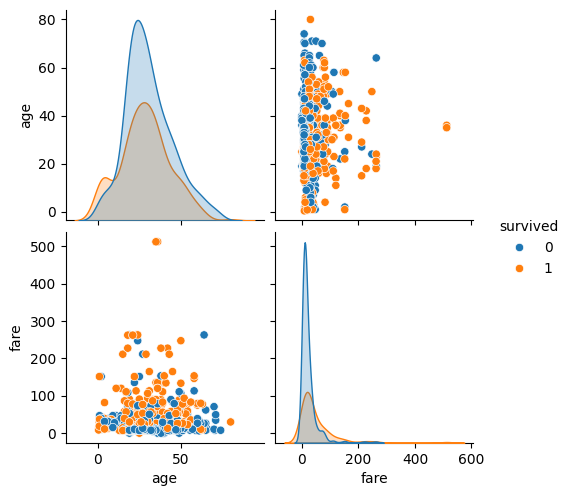

In [1]:

# EDA Task -  Univariate Non Graphical & Graphical Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# df = sns.load_dataset("titanic")

df = sns.load_dataset("titanic")

# df = pd.read_csv("titanic.csv")

# df.to_csv(r"C:\Users\XNovaQ.7\Desktop\Pandas_Data_Formats\titanic.csv", index=False)


print(df.head())


print("Null Values in age:", df['age'].isna().sum())

# print(df)

age = df['age'].dropna()  

# Univariate non-graphical analysis
summary = {
    "Count": age.count(),
    "Mean": age.mean(),
    "Median": age.median(),
    "Mode": age.mode().tolist(),
    "Minimum": age.min(),
    "Maximum": age.max(),
    "Range": age.max() - age.min(),
    "Variance": age.var(),
    "Standard Deviation": age.std(),
    "Skewness": age.skew(),
    "Kurtosis": age.kurt()
}

print(pd.Series(summary))


# Age distribution
sns.histplot(df['age'], bins=8)  # kde=True adds smooth curve
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Boxplot to see spread and outliers
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()

# Count of passengers by sex
sns.countplot(x='sex', data=df)
plt.title('Number of Passengers by Sex')
plt.show()

# Count of passengers by class
sns.countplot(x='class', data=df)
plt.title('Number of Passengers by Class')
plt.show()

# Age distribution by class
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Class')
plt.show()


# ========================
# 🔹 Non-Graphical Analysis
# ========================

# Correlation matrix (numeric features only)
print("Correlation Matrix (numeric variables):")
print(df.corr(numeric_only=True))

# Crosstab: Survival by Sex
print("\nSurvival by Sex:")
print(pd.crosstab(df['sex'], df['survived']))

# Grouped statistics: Average age & fare by class and sex
print("\nAverage Age & Fare by Class and Sex:")
print(df.groupby(['class', 'sex'])[['age', 'fare']].mean())


# ========================
# 🔹 Graphical Analysis
# ========================

# Heatmap for correlations
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()

# Survival by sex (stacked bar)
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Survival Count by Sex")
plt.show()

# Survival by class
sns.countplot(x="class", hue="survived", data=df)
plt.title("Survival Count by Class")
plt.show()

# Age vs Fare scatterplot (colored by survival)
sns.scatterplot(x="age", y="fare", hue="survived", data=df)
plt.title("Age vs Fare (Survival Highlighted)")
plt.show()

# Pairplot for multiple numeric variables
sns.pairplot(df[['age', 'fare', 'survived']], hue="survived")
plt.show()

